In [1]:
import numpy as np
from itertools import islice
import matplotlib.pyplot as plt

In [3]:
#features of the statistically desined HP
# LBhand1 = 0.17138447999999998 
# LBhand3 = 0.33385787000000006
# UBhand1 = 0.21000033658099998 
# UBhand3 = 0.485000336593

#features of the solution-designed HP
LBhand1 = 1.78728e-01 
LBhand3 = 1.99577e-01
UBhand1 = 3.55230e-01 
UBhand3 = 4.47151e-01
range1hand = UBhand1-LBhand1
range3hand = UBhand3 - LBhand3

First the solutions that were evolved with the LB/UB encoding

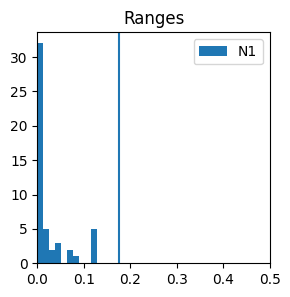

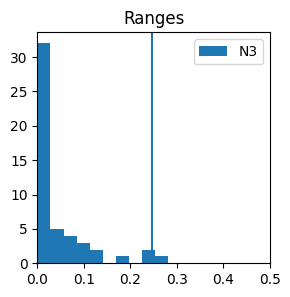

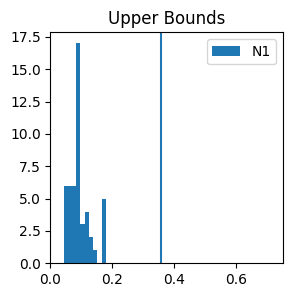

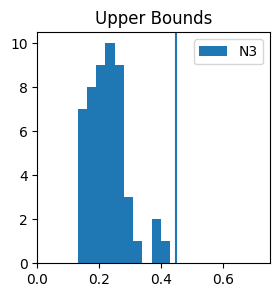

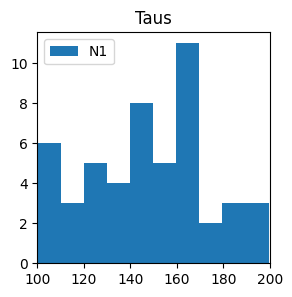

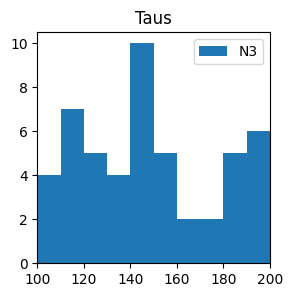

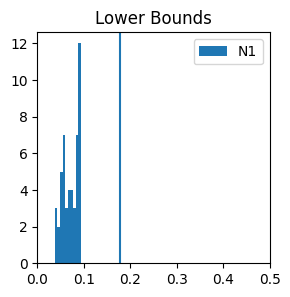

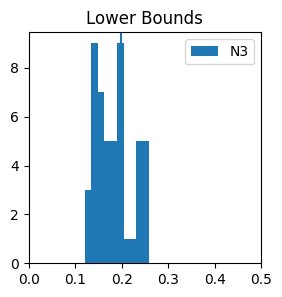

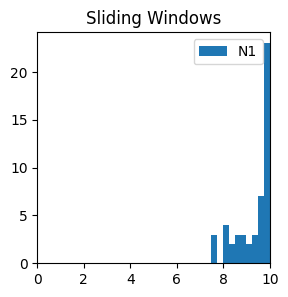

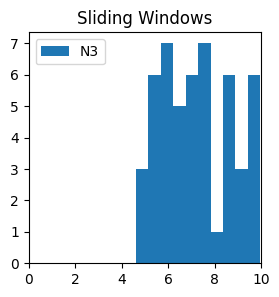

[40.7495 37.0162 41.104  37.4286 38.6786 38.0371 36.036  42.4234 37.6409
 36.6179 39.7207 39.976  39.2747 35.6498 36.9546 35.286  36.8798 37.4901
 39.0718 35.1301 36.0658 38.897  39.0266 39.3837 37.6159 37.7594 34.9158
 40.0247 40.2582 40.3477 41.9387 39.6097 42.4074 36.5341 42.8598 41.2531
 41.9122 37.0361 36.0185 37.6201 37.7386 37.7386 36.148  36.148  39.1367
 40.6088 40.6088 39.0509 43.8381 39.5487]
(array([48]),)


In [47]:
N = 2 #number of params that are being plastically controlled
rangevals = np.zeros((2,50))
UBvals_1 = np.zeros((2,50))
squishnum = np.zeros((50))
tauvals = np.zeros((2,50))
LBvals_1 = np.zeros((2,50))
SWvals = np.zeros((2,50))
fitnesses_1 = np.zeros(50)
for i in range(50):
    filename = '../Cpp/%s/bestindsfastsuper.dat'%i
    with open(filename,"r") as f:
        generation = np.loadtxt(islice(f, 1))
        [gen,phen] = np.loadtxt(islice(f, 2))
        fit = np.loadtxt(islice(f,3))
        fitnesses_1[i] = fit
        taus = phen[0:N]
        LBs = phen[N:2*N]
        UBs = phen[2*N:3*N]
        ranges = UBs-LBs
        SWs = phen[3*N:4*N]
        # print(taus, LBs, ranges, SWs)
        UBvals_1[:,i] = UBs
        rangevals[:,i] = ranges
        tauvals[:,i] = taus
        LBvals_1[:,i] = LBs
        SWvals[:,i] = SWs
        for k in range(N):
            if ranges[k] < .05:
                squishnum[i] += 1

plt.hist(rangevals[0],label='N1')
plt.legend()
plt.title('Ranges')
plt.xlim(0,.5)
plt.axvline(range1hand)
plt.show()
plt.hist(rangevals[1],label='N3')
plt.legend()
plt.title('Ranges')
plt.xlim(0,.5)
plt.axvline(range3hand)
plt.show()
plt.hist(UBvals_1[0],label='N1')
plt.legend()
plt.title('Upper Bounds')
plt.xlim(0,.75)
plt.axvline(UBhand1)
plt.show()
plt.hist(UBvals_1[1],label='N3')
plt.legend()
plt.title('Upper Bounds')
plt.xlim(0,.75)
plt.axvline(UBhand3)
plt.show()
plt.hist(tauvals[0],label='N1')
plt.legend()
plt.title('Taus')
plt.xlim(100,200)
plt.show()
plt.hist(tauvals[1],label='N3')
plt.legend()
plt.title('Taus')
plt.xlim(100,200)
plt.show()
plt.hist(LBvals_1[0],label='N1')
plt.legend()
plt.title('Lower Bounds')
plt.xlim(0,.5)
plt.axvline(LBhand1)
plt.show()
plt.hist(LBvals_1[1],label='N3')
plt.legend()
plt.title('Lower Bounds')
plt.axvline(LBhand3)
plt.xlim(0,.5)
plt.show()
plt.hist(SWvals[0],label='N1')
plt.legend()
plt.title('Sliding Windows')
plt.xlim(0,10)
plt.show()
plt.hist(SWvals[1],label='N3')
plt.legend()
plt.title('Sliding Windows')
plt.xlim(0,10)
plt.show()
# print(squishnum)
# print(len(np.where(squishnum>=1)[0]),len(np.where(squishnum==2)[0]))
print(fitnesses_1)
print(np.where(fitnesses_1==np.max(fitnesses_1)))

Then the solutions that were evolved with the LB/range encoding

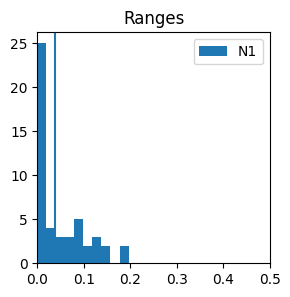

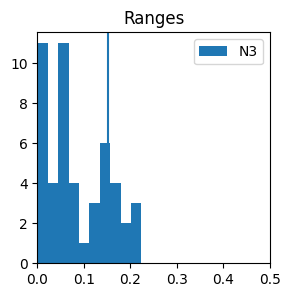

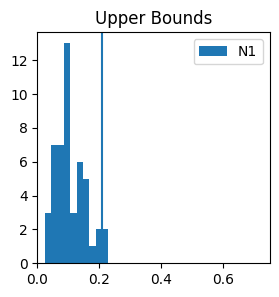

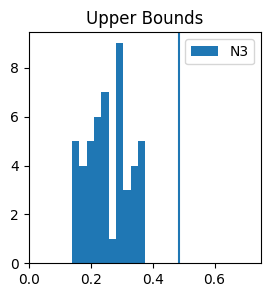

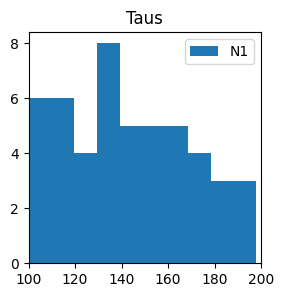

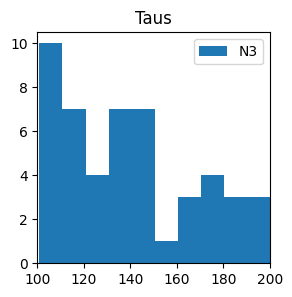

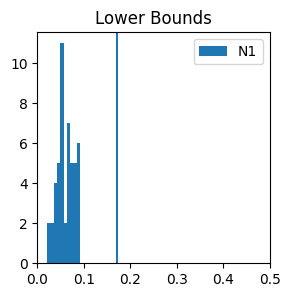

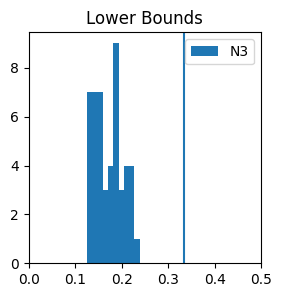

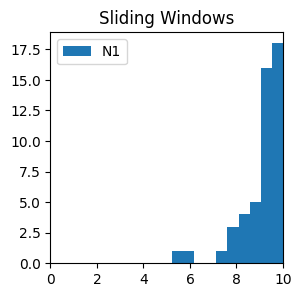

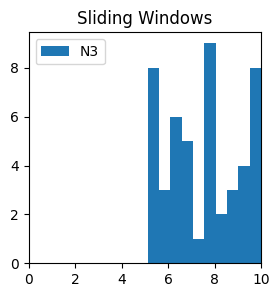

[33.9037 40.4078 35.7109 40.339  37.2564 36.244  40.3755 33.0403 36.2509
 35.7369 35.7738 35.4302 39.8799 35.6477 41.142  38.9929 31.9698 42.5452
 43.8137 41.0241 40.7327 38.5014 38.5014 36.1341 35.5509 41.3461 37.9153
 40.3712 41.3461 35.5446 40.3712 35.5446 40.9259 41.9783 37.8213 33.0719
 40.5796 36.6312 29.087  34.878  41.7285 36.3081 40.8643 41.0592 37.9022
 38.0577 39.5155 35.902  37.1076]
(array([18]),)
[0.00636786 0.00526807 0.103767   0.021862   0.         0.
 0.0110599  0.0493264  0.00940315 0.145712   0.0447891  0.13322
 0.007041   0.00588931 0.0132532  0.00065261 0.00324464 0.0325439
 0.0968827  0.0274498  0.0843446  0.0918808  0.0918808  0.0630034
 0.122703   0.00169288 0.0556577  0.0194761  0.00169288 0.196427
 0.0194761  0.196427   0.030165   0.00391106 0.0596138  0.102602
 0.0037961  0.         0.         0.         0.137859   0.0810802
 0.00235321 0.059295   0.00110049 0.119314   0.016741   0.
 0.0190436 ] 0.196427
(array([29, 31]),)


In [71]:
#compare with the genomes that evolved with the new (range-based) encoding
N = 2 #number of params that are being plastically controlled
rangevals = np.zeros((2,49))
squishnum = np.zeros((49))
tauvals = np.zeros((2,49))
UBvals_2 = np.zeros((2,49))
LBvals_2 = np.zeros((2,49))
SWvals = np.zeros((2,49))
fitnesses_2 = np.zeros(49)
for i in range(101,150):
    filename = '../Cpp/%s/bestinds.dat'%i
    with open(filename,"r") as f:
        generation = np.loadtxt(islice(f, 1))
        [gen,phen] = np.loadtxt(islice(f, 2))
        fit = np.loadtxt(islice(f,3))
        fitnesses_2[i-101] = fit
        taus = phen[0:N]
        LBs = phen[N:2*N]
        ranges = phen[2*N:3*N]
        UBs = LBs+ranges
        SWs = phen[3*N:4*N]
        # print(taus, LBs, ranges, SWs)
        rangevals[:,i-101] = ranges
        tauvals[:,i-101] = taus
        LBvals_2[:,i-101] = LBs
        UBvals_2[:,i-101] = UBs
        SWvals[:,i-101] = SWs
        for k in range(N):
            if ranges[k] < .05:
                squishnum[i-101] += 1

plt.hist(rangevals[0],label='N1')
plt.legend()
plt.title('Ranges')
plt.xlim(0,.5)
plt.axvline(range1hand)
plt.show()
plt.hist(rangevals[1],label='N3')
plt.legend()
plt.title('Ranges')
plt.xlim(0,.5)
plt.axvline(range3hand)
plt.show()
plt.hist(UBvals_2[0],label='N1')
plt.legend()
plt.title('Upper Bounds')
plt.xlim(0,.75)
plt.axvline(UBhand1)
plt.show()
plt.hist(UBvals_2[1],label='N3')
plt.legend()
plt.title('Upper Bounds')
plt.xlim(0,.75)
plt.axvline(UBhand3)
plt.show()
plt.hist(tauvals[0],label='N1')
plt.legend()
plt.title('Taus')
plt.xlim(100,200)
plt.show()
plt.hist(tauvals[1],label='N3')
plt.legend()
plt.title('Taus')
plt.xlim(100,200)
plt.show()
plt.hist(LBvals_2[0],label='N1')
plt.legend()
plt.title('Lower Bounds')
plt.xlim(0,.5)
plt.axvline(LBhand1)
plt.show()
plt.hist(LBvals_2[1],label='N3')
plt.legend()
plt.title('Lower Bounds')
plt.axvline(LBhand3)
plt.xlim(0,.5)
plt.show()
plt.hist(SWvals[0],label='N1')
plt.legend()
plt.title('Sliding Windows')
plt.xlim(0,10)
plt.show()
plt.hist(SWvals[1],label='N3')
plt.legend()
plt.title('Sliding Windows')
plt.xlim(0,10)
plt.show()
# print(squishnum)
# print(len(np.where(squishnum>=1)[0]),len(np.where(squishnum==2)[0]))
print(fitnesses_2)
print(np.where(fitnesses_2==np.max(fitnesses_2)))
print(rangevals[0,:], np.max(rangevals[0,:]))
print(np.where(rangevals[0,:] == np.max(rangevals[0,:])))

Better visualization of clusters in HP paramter space?

Plot (LB,UB) points (blue for LB/UB encoding, orange for range encoding)

In [28]:
#so we can color the points based on relative fitness
norm_fitness_1 = (fitnesses_1-min(fitnesses_1)+.1)/(max(fitnesses_1)-min(fitnesses_1)+.1)
norm_fitness_2 = (fitnesses_2-min(fitnesses_2)+.1)/(max(fitnesses_2)-min(fitnesses_2)+.1)

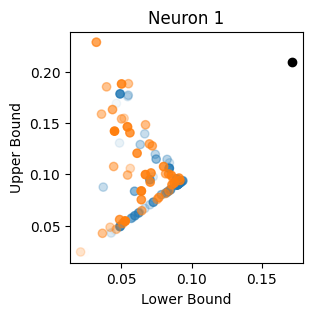

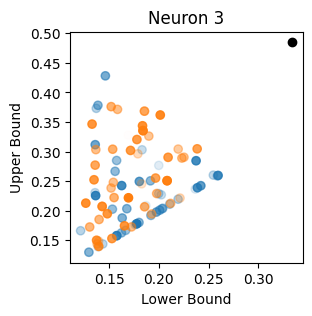

In [29]:
plt.title('Neuron 1')
plt.xlabel('Lower Bound')
plt.ylabel('Upper Bound')
plt.scatter(LBvals_1[0,:],UBvals_1[0,:],color='tab:blue',alpha = norm_fitness_1)
plt.scatter(LBvals_2[0,:],UBvals_2[0,:],color='tab:orange',alpha = norm_fitness_2)
plt.scatter(LBhand1,UBhand1,color='k')
plt.show()

plt.title('Neuron 3')
plt.xlabel('Lower Bound')
plt.ylabel('Upper Bound')
plt.scatter(LBvals_1[1,:],UBvals_1[1,:],color='tab:blue',alpha = norm_fitness_1)
plt.scatter(LBvals_2[1,:],UBvals_2[1,:],color='tab:orange',alpha = norm_fitness_2)
plt.scatter(LBhand3,UBhand3,color='k')
plt.show()

Yes, the blue dots (LB/UB encoding) definitely do get squished (upwards line) more often, but the orange ones do, too

What kinds of permissibility do these mechanisms have?

In [53]:
par1_min_mm = -16
par1_max_mm = 16
par2_min_mm = -16
par2_max_mm = 16
par1_step_mm = .1
par2_step_mm = .1

par1_res_mm = np.arange(par1_min_mm,par1_max_mm+par1_step_mm,par1_step_mm)
print(len(par1_res_mm))
par2_res_mm = np.arange(par2_min_mm,par2_max_mm+par2_step_mm,par2_step_mm)
print(len(par2_res_mm))

321
321


In [71]:
#get pyloric slice data up in here (and fill in non-sampled values with zeros)
par1 = 'theta1'
par2 = 'theta3'

par1_min = 0
par1_max = 10
par2_min = -15
par2_max = 0
par1_step = .05
par2_step = .05

par1_res = np.arange(par1_min,par1_max,par1_step)
par2_res = np.arange(par2_min,par2_max,par2_step)
fitnessdata = np.loadtxt('../Cpp/realmacc_slice.dat').T
fitnessarray = np.zeros((len(par2_res_mm),len(par1_res_mm)))
fitnessarray[0:len(par2_res),0:len(par1_res)] = fitnessdata #incorrectly positioned wrt actual parameters
fitnessdata = fitnessarray
print(len(fitnessdata[0]),len(fitnessdata[:,0]))
# print(np.where(fitnessdata<.3))
Z_Static = np.ma.masked_greater_equal(fitnessdata, 0.15)
# Z_Static = Z_Static.filled(0.3)
Z_Disorder = np.ma.masked_less(fitnessdata, 0.15)
Z_Disorder = np.ma.masked_greater_equal(Z_Disorder,0.3)
# Z_Disorder = Z_Disorder.filled(0)
# print(np.where(Z_Disorder==.3))
# print(Z_Disorder)
Z_Pyloric = np.ma.masked_less(fitnessdata,0.3)
print(len(Z_Pyloric[0]),len(Z_Pyloric[:,0]))

321 321
321 321


Red dot = location of peak Pyloric fitness


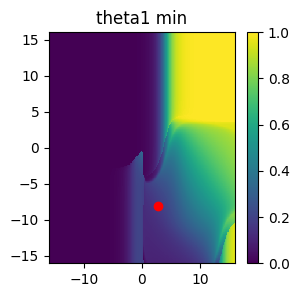

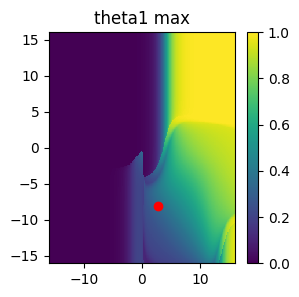

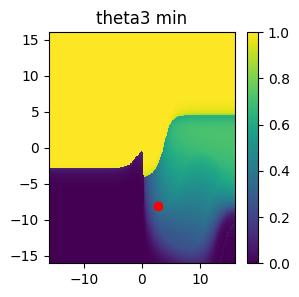

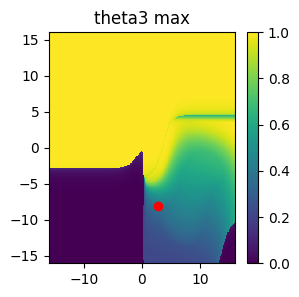

In [76]:
#Realm of Acceptability slice for HP #48 (SW sizes = 9.92872 6.0916)
plt.rcParams["figure.figsize"]=(3,3)
maxmindata = np.loadtxt('../Cpp/Pete_maxmindetected_HP48.dat')
maxmindata = np.reshape(maxmindata,(len(par1_res_mm),len(par2_res_mm),2,3))
maxmindata = np.swapaxes(maxmindata,1,0)
# print(len(accdata[:,:,0]),len(accdata[:,:,0][0]))
print("Red dot = location of peak Pyloric fitness")

plt.title(par1 + " min")
theta1_max = maxmindata[:,:,0,0]
plt.pcolormesh(par1_res_mm,par2_res_mm,maxmindata[:,:,0,0])
plt.scatter(2.68606, -8.09309,color='r')
plt.colorbar()
plt.show()
plt.title(par1 + " max")
theta1_min = maxmindata[:,:,1,0]
plt.pcolormesh(par1_res_mm,par2_res_mm,maxmindata[:,:,1,0])
plt.scatter(2.68606, -8.09309,color='r')
plt.colorbar()
plt.show()

plt.title(par2 + " min")
theta2_max = maxmindata[:,:,0,2]
plt.pcolormesh(par1_res_mm,par2_res_mm,maxmindata[:,:,0,2])
plt.scatter(2.68606, -8.09309,color='r')
plt.colorbar()
plt.show()
plt.title(par2 + " max")
theta2_min = maxmindata[:,:,1,2]
plt.pcolormesh(par1_res_mm,par2_res_mm,maxmindata[:,:,1,2])
plt.scatter(2.68606, -8.09309,color='r')
plt.colorbar()
plt.show()

In [43]:
#what is the max-min as close as you can get to the red point?
# 2.68606, -8.09309
print(par1_res[187],par2_res[79])
maxminpeak = maxmindata[187,79,:,:]
print(maxminpeak)


2.699999999999932 -8.100000000000028
[[2.67114e-06 8.69002e-10 9.96824e-01]
 [1.17314e-05 2.42586e-03 9.99946e-01]]


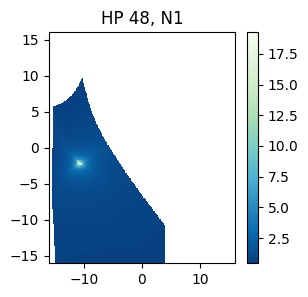

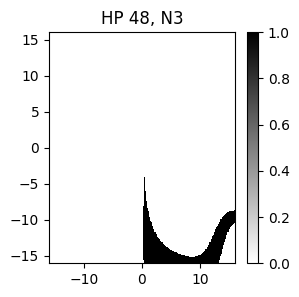

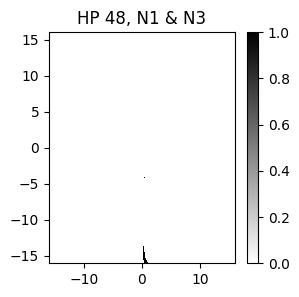

In [77]:
#now can plot the permissibility for any given HP mechanism
HPidx =  48 #relative to its respective encoding group

# #uncomment for LB/UB encoding
UBvals = UBvals_1
LBvals = LBvals_1

# uncomment for LB/Range encoding
# UBvals = UBvals_2
# LBvals = LBvals_2

uppr = UBvals[:,HPidx]
lwr = LBvals[:,HPidx]

#uncomment for hand-designed HPs
# uppr = [UBhand1,UBhand3]
# lwr = [LBhand1,LBhand3]

# print(maxmindata[:,:,1,0]>lwr[0],'\n',maxmindata[:,:,0,0]<uppr[0])
# print(np.logical_and(maxmindata[:,:,1,0]>lwr[0], maxmindata[:,:,0,0]<uppr[0]).astype(int))
# print(maxmindata[:,:,0,0],lwr[0],maxmindata[:,:,0,0]<uppr[0])

n1_acc = np.logical_and(maxmindata[:,:,1,0]>lwr[0], maxmindata[:,:,0,0]<uppr[0]).astype(int)
n3_acc = np.logical_and(maxmindata[:,:,1,2]>lwr[1], maxmindata[:,:,0,2]<uppr[1]).astype(int)

plt.title('HP %s, N1'%HPidx)
# plt.pcolormesh(par1_res_mm,par2_res_mm,n1_acc,cmap='binary')
plt.pcolormesh(par1_res_mm,par2_res_mm,Z_Pyloric, cmap='GnBu_r')
plt.colorbar()
plt.show()
plt.title('HP %s, N3'%HPidx)
plt.pcolormesh(par1_res_mm,par2_res_mm,n3_acc,cmap='binary')
plt.colorbar()
plt.show()
plt.title('HP %s, N1 & N3'%HPidx)
plt.pcolormesh(par1_res_mm,par2_res_mm,(n1_acc+n3_acc>=2).astype(int),cmap='binary')
plt.colorbar()
plt.show()
# plt.pcolormesh(par1_res,par2_res,np.sum(n1_acc,n3_acc), cmap='binary')


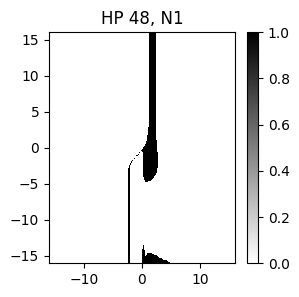

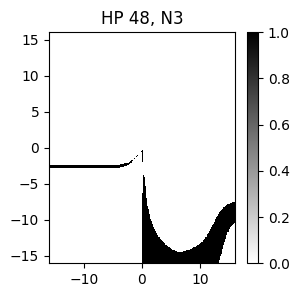

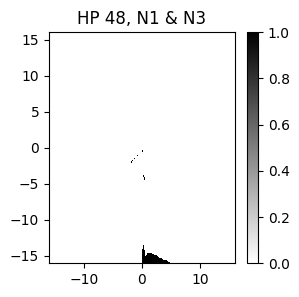

In [52]:
#measure for how far outside the range the max and min are
# LBhand1 = 0.17138447999999998 
# LBhand3 = 0.33385787000000006
# UBhand1 = 0.21000033658099998 
# UBhand3 = 0.485000336593
# uppr = [UBhand1,UBhand3]
# lwr = [LBhand1,LBhand3]

thresh = .01 #detect any points where the max and min detected are within the threshold on BOTH SIDES

n1_thresh = np.logical_and((maxmindata[:,:,1,0]-lwr[0])>-thresh, (maxmindata[:,:,0,0]-uppr[0])<thresh).astype(int)
n3_thresh = np.logical_and((maxmindata[:,:,1,2]-lwr[1])>-thresh, (maxmindata[:,:,0,2]-uppr[1])<thresh).astype(int)

plt.title('HP %s, N1'%HPidx)
plt.pcolormesh(par1_res,par2_res,n1_thresh,cmap='binary')
plt.colorbar()
plt.show()
plt.title('HP %s, N3'%HPidx)
plt.pcolormesh(par1_res,par2_res,n3_thresh,cmap='binary')
plt.colorbar()
plt.show()
plt.title('HP %s, N1 & N3'%HPidx)
plt.pcolormesh(par1_res,par2_res,(n1_thresh+n3_thresh>=2).astype(int),cmap='binary')
plt.colorbar()
plt.show()

In [107]:
print(maxminpeak[0,0] - lwr[0], maxminpeak[0,2] - lwr[1])
print(maxminpeak[1,0] - lwr[0], maxminpeak[1,2] - lwr[1])

0.3210715 0.261242
0.14535550000000003 0.013660000000000005


What have we learned: evolved HP mechanisms are NOT intuitive with respect to the max and min detected. Good HP mechanisms DO activate while their pyloric patterns are going on.

What's more, we can't even base things off being "close enough" to the range. Points with max and min close to the range are often not where solutions end up. Instead, it is much more stabilizing to have a configuration that moves you into a limit cycle, even if the magnitude of activations would be large, were the system allowed to evolve in place.

Moreover, looking at one neuron isn't enough. In fact, for some of these good HP mechanisms, the only place that HP DOESN'T activate on one of the neurons is the fixed point, but it activates in the other neuron so that is not a sustainable configuration

If you're an experimentalist, you could still measure general parameter configurations where the activations never exceed a certain magnitude, but this would be hard to tell from areas where things are just slow, but the solution will never return to that point again. And the magnitude isn't low because it would be theoretically low if you were to pretend HP was infinitely slow. Just because the trajectories are organized to double back on themselves. 

Starting over with the correct eulerstep function and all having the range encoding

In [2]:
N = 2 #number of params that are being plastically controlled
num_indivs = 100
num_slns_per_indiv = 5

rangevals = np.zeros((num_indivs,num_slns_per_indiv,N))
UBvals = np.zeros((num_indivs,num_slns_per_indiv,N))
squishnum = np.zeros((num_indivs,num_slns_per_indiv))
tauvals = np.zeros((num_indivs,num_slns_per_indiv,N))
LBvals = np.zeros((num_indivs,num_slns_per_indiv,N))
SWvals = np.zeros((num_indivs,num_slns_per_indiv,N))
fitnesses = np.zeros((num_indivs,num_slns_per_indiv)) # I no longer trust the actual fitness function that I used to evolve these is informative 
                                                      # (pyloric fitness changed to incorp more orderings, scaling factor maybe changed, not long
                                                      # enough runtime, shifted HP now whereas might have evolved with scaled HP...), so I will 
                                                      # use a new fitness measure based on the percentage of recovered initial conditions after 
                                                      # 50,000 seconds (stepsize = .01)
for i in range(num_indivs):
    for j in range(num_slns_per_indiv):
        filename = '../Cpp/Specifically Evolved HP Mechanisms/Every Circuit/%s/%s/bestind.dat'%(i,j)
        recovery = np.loadtxt('../Cpp/Specifically Evolved HP Mechanisms/Every Circuit/%s/%s/recoverytest.dat'%(i,j)).reshape((-1,121))[:,-1]
        fitnesses[i,j] = len(np.where(recovery>.3)[0])
        with open(filename,"r") as f:
            plasticpars = np.loadtxt(islice(f, 1))
            [gen,phen] = np.loadtxt(islice(f, 2))
            fit = np.loadtxt(islice(f,3))
            taus = phen[0:N]
            LBs = phen[N:2*N]
            ranges = phen[2*N:3*N]
            UBs = np.clip(LBs+ranges,a_min=0,a_max=1)
            SWs = phen[3*N:4*N]
            # print(taus, LBs, ranges, SWs)
            UBvals[i,j] = UBs
            rangevals[i,j] = ranges
            tauvals[i,j] = taus
            LBvals[i,j] = LBs
            SWvals[i,j] = SWs
            for k in range(N):
                if ranges[k] < .05:
                    squishnum[i] += 1

In [23]:
#how many do i have to re-evolve because they went through with the same seed?/how many solns are identical
copy_idxs = []
copy_nums = []
triples = 0
for i in range(150):
    num = len(np.where(fitnesses == fitnesses[i])[0])
    if num>1:
        copy_idxs.append(np.where(fitnesses == fitnesses[i])[0])
        copy_nums.append(num)
        if num == 3:
            triples += 1
triples = triples/3
print(copy_idxs)
print(triples)
# print(copy_nums)
# print(fitnesses)
print(((len(copy_idxs)-triples)/2)+triples)

[]
0.0
0.0


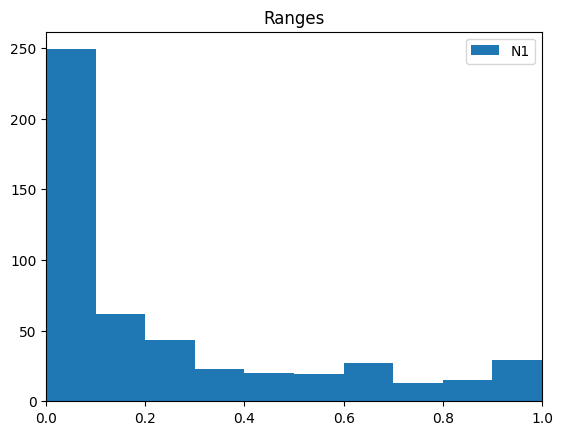

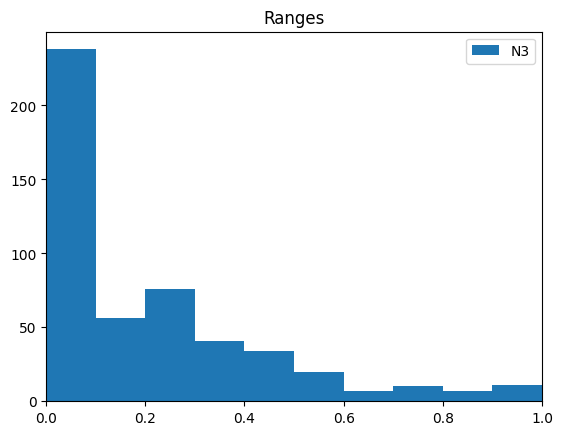

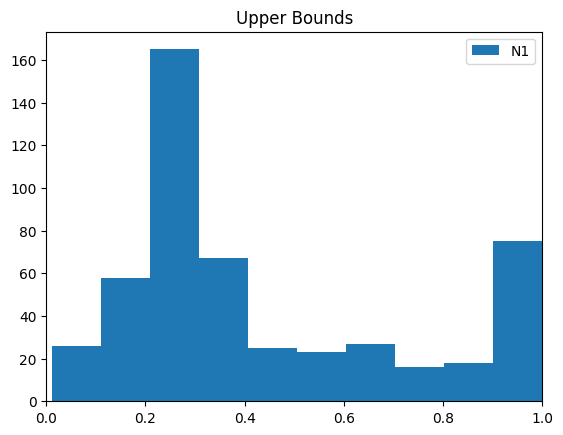

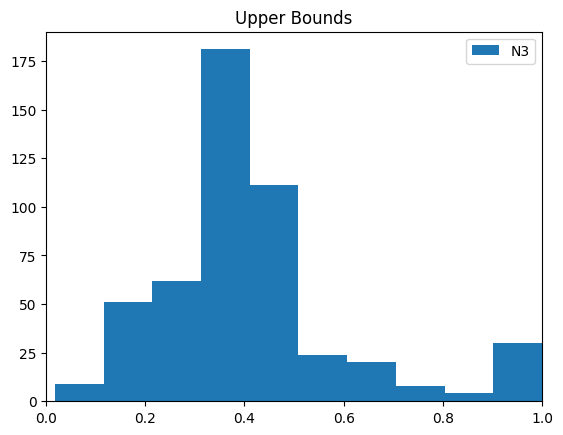

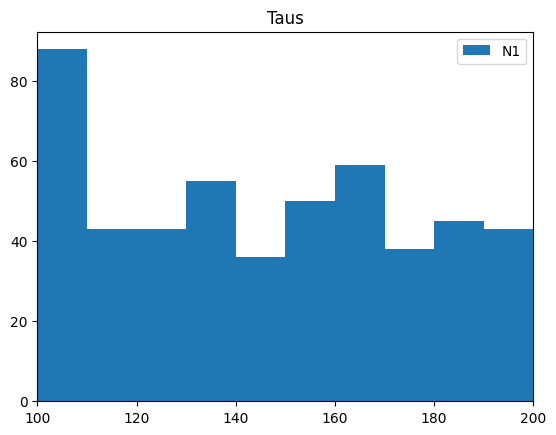

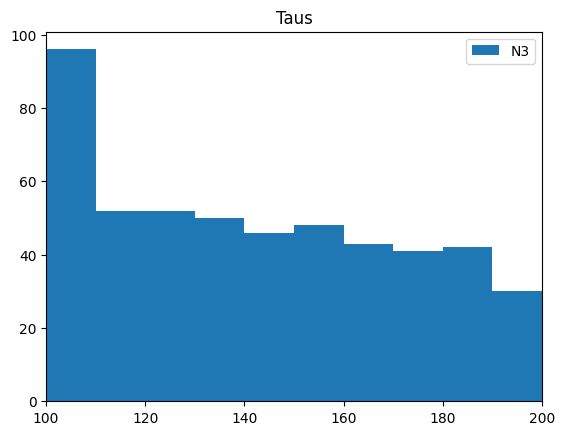

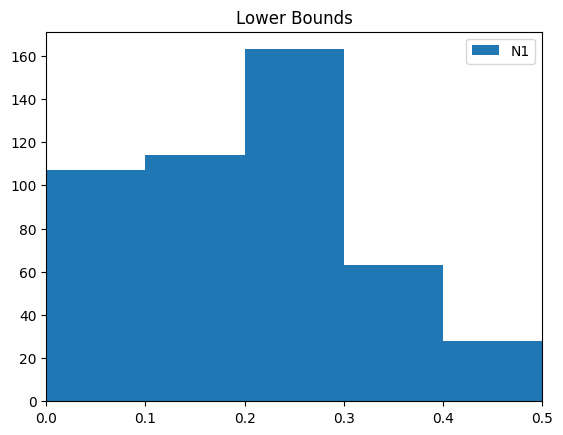

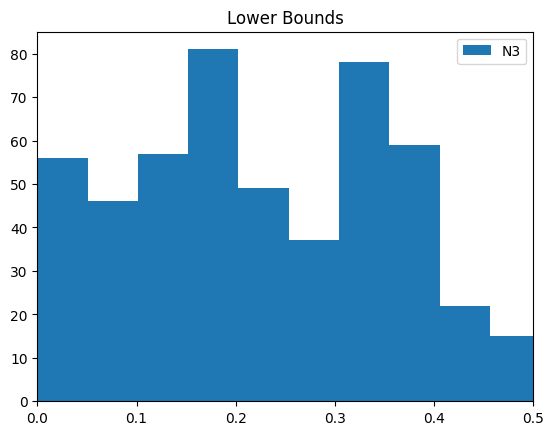

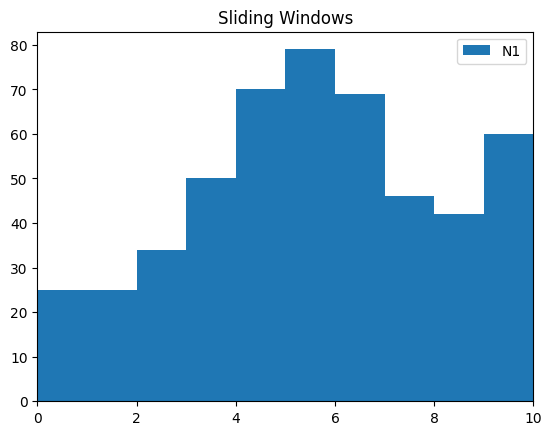

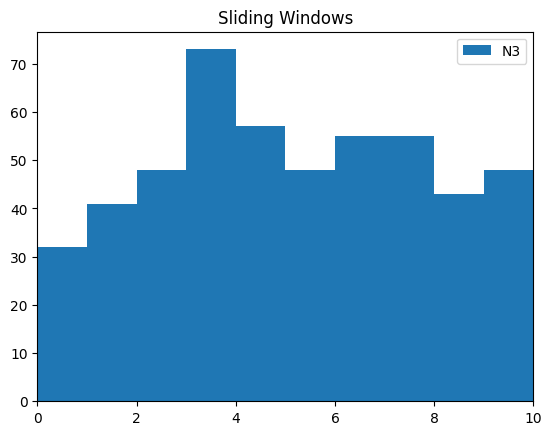

MAX: [[ 1  1]
 [ 1  3]
 [ 5  3]
 [58  1]
 [78  2]
 [78  4]
 [82  2]
 [91  0]
 [91  1]
 [91  2]
 [91  3]
 [92  1]
 [92  2]
 [92  4]]


In [9]:
#histograms of evolved characteristics
plt.hist(rangevals[:,:,0].flatten(),label='N1')
plt.legend()
plt.title('Ranges')
plt.xlim(0,1)
plt.show()
plt.hist(rangevals[:,:,1].flatten(),label='N3')
plt.legend()
plt.title('Ranges')
plt.xlim(0,1)
plt.show()
plt.hist(UBvals[:,:,0].flatten(),label='N1')
plt.legend()
plt.title('Upper Bounds')
plt.xlim(0,1)
plt.show()
plt.hist(UBvals[:,:,1].flatten(),label='N3')
plt.legend()
plt.title('Upper Bounds')
plt.xlim(0,1)
plt.show()
plt.hist(tauvals[:,:,0].flatten(),label='N1')
plt.legend()
plt.title('Taus')
plt.xlim(100,200)
plt.show()
plt.hist(tauvals[:,:,1].flatten(),label='N3')
plt.legend()
plt.title('Taus')
plt.xlim(100,200)
plt.show()
plt.hist(LBvals[:,:,0].flatten(),label='N1')
plt.legend()
plt.title('Lower Bounds')
plt.xlim(0,.5)
plt.show()
plt.hist(LBvals[:,:,1].flatten(),label='N3')
plt.legend()
plt.title('Lower Bounds')
plt.xlim(0,.5)
plt.show()
plt.hist(SWvals[:,:,0].flatten(),label='N1')
plt.legend()
plt.title('Sliding Windows')
plt.xlim(0,10)
plt.show()
plt.hist(SWvals[:,:,1].flatten(),label='N3')
plt.legend()
plt.title('Sliding Windows')
plt.xlim(0,10)
plt.show()
# print(squishnum)
# print(len(np.where(squishnum>=1)[0]),len(np.where(squishnum==2)[0]))
# print(fitnesses)
# print('MIN:', np.column_stack(np.where(fitnesses==np.min(fitnesses))))
print('MAX:', np.column_stack(np.where(fitnesses==np.max(fitnesses))))

Ask the question about the relationship between range and fitness: is squashed range correlated with higher fitness solutions, or at least are wide ranges more likely to be mixed, while squashed is either bad or good?

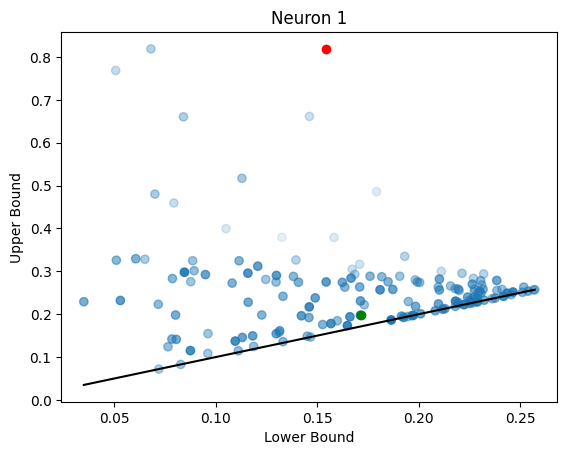

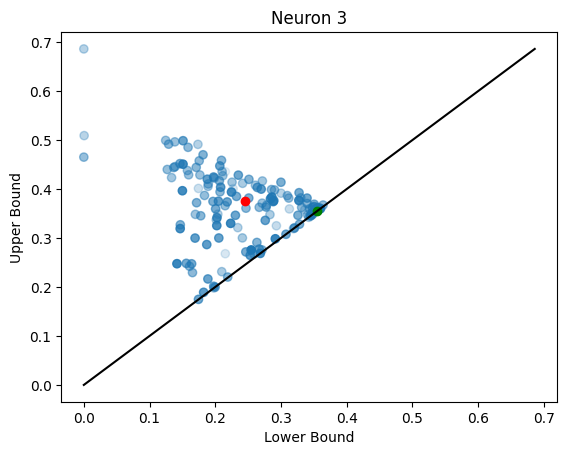

In [30]:
norm_fitness = (fitnesses-min(fitnesses)+.1)/(max(fitnesses)-min(fitnesses)+.1)
x1s = np.linspace(min(LBvals[0,:]),max(LBvals[0,:]),100)
x2s = np.linspace(min(LBvals[1,:]),max(UBvals[1,:]),100)


plt.title('Neuron 1')
plt.xlabel('Lower Bound')
plt.ylabel('Upper Bound')
plt.scatter(LBvals[0,:],UBvals[0,:],color='tab:blue',alpha = norm_fitness)
# plt.scatter(LBhand1,UBhand1,color='k')
plt.scatter(LBvals[0,33],UBvals[0,33],color='g') #best evolved solution
plt.scatter(LBvals[0,37],UBvals[0,37],color='r') #worst evolved solution
plt.plot(x1s,x1s,color='k')
#singular value that 
plt.show()

plt.title('Neuron 3')
plt.xlabel('Lower Bound')
plt.ylabel('Upper Bound')
plt.scatter(LBvals[1,:],UBvals[1,:],color='tab:blue',alpha = norm_fitness)
# plt.scatter(LBhand3,UBhand3,color='k')
plt.scatter(LBvals[1,33],UBvals[1,33],color='g') #best evolved solution
plt.scatter(LBvals[1,37],UBvals[1,37],color='r') #worst evolved solution
plt.plot(x2s,x2s,color='k')
plt.show()

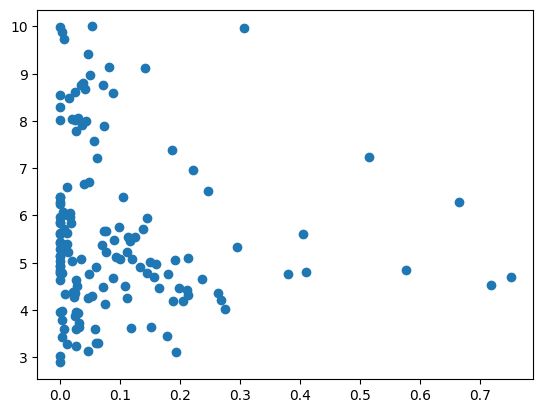

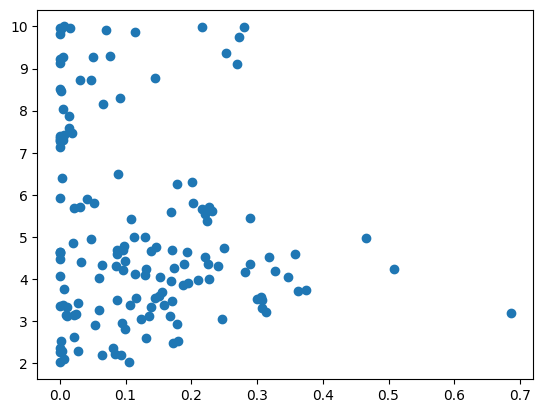

In [31]:
#relationship between sliding window value and range width?
plt.scatter(rangevals[0,:],SWvals[0,:])
plt.show()
plt.scatter(rangevals[1,:],SWvals[1,:])
plt.show()